In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [3]:
x = df[["x"]].values
y = df.y.values

In [4]:
### edTest(test_random) ###

# Split the dataset into train and validation sets with 75% training set
# Set random_state=1
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=1)

In [5]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 20

# Create two empty lists to store training and validation MSEs
training_error = []
validation_error = []

# Loop through the degrees of the polynomial to create different models
for d in range(1, maxdeg + 1):
    # Compute polynomial features for training and validation sets
    poly_features = PolynomialFeatures(degree=d)
    x_poly_train = poly_features.fit_transform(x_train)
    x_poly_val = poly_features.transform(x_val)

    # Initialize and fit the linear regression model
    lreg = LinearRegression()
    lreg.fit(x_poly_train, y_train)

    # Predict on training and validation data
    y_train_pred = lreg.predict(x_poly_train)
    y_val_pred = lreg.predict(x_poly_val)

    # Compute and store mean squared errors
    training_error.append(mean_squared_error(y_train, y_train_pred))
    validation_error.append(mean_squared_error(y_val, y_val_pred))

In [6]:
### edTest(test_best_degree) ###

# Helper code to compute the best degree, which is the model 
# with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)+1

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)

The best degree of the model is 2


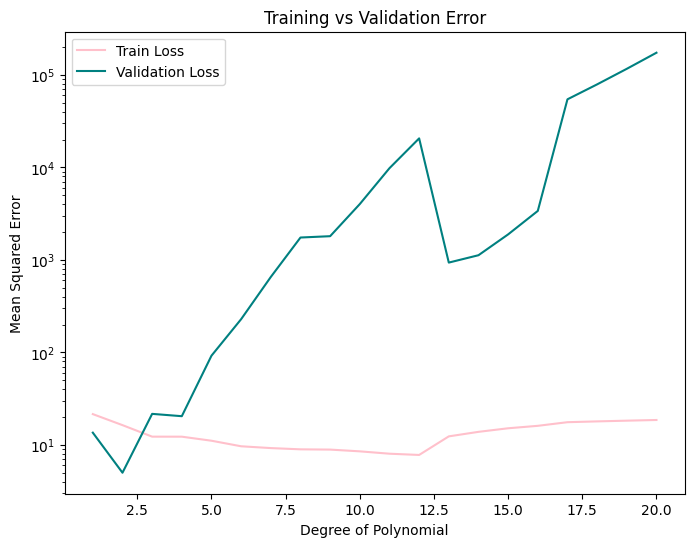

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, maxdeg + 1), training_error, label="Train Loss", color="pink")
plt.plot(range(1, maxdeg + 1), validation_error, label="Validation Loss", color="teal")
plt.yscale("log")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Validation Error")
plt.legend()
plt.show()